## Evaluate a sample and visualize the result

#### Load the CT scan, GT and our prediction

In [1]:
scan_file = 'sample/verse815_CT-iso.nii.gz'
gt_seg_file = 'sample/verse815_CT-iso_seg_gt.nii.gz'
gt_ctd_file = 'sample/verse815_CT-iso_iso-ctd_gt.json'
pred_seg_file = 'sample/verse815_CT-iso_seg.nii.gz'
pred_ctd_file = 'sample/verse815_CT-iso_ctd.json'

#### Evaluate the result following the VerSe20 challenge evaluation protocol
<ul>
<li><i>Dice coefficient(DSC)</i>: a variant of intersection over union to asses the similarity of two segmentations.</li>
<li><i>Hausdorff Distance(HD)</i>: the Hausdorff distance between two segmentation surfaces.</li>
<li><i>Mean Localization Distance(MLD)</i>: measuring the Euclidean distance of the predicted location to the GT location.</li>
<li><i>Identification rate(ID rate)</i>: a predicted location within 20mm from the GT location is considered as a valid identification and the ID rate is the ratio of valid identifications over all present vertebrae.</li>
</ul>


The implementation of the metrics is respecting the <a href="https://doi.org/10.1016/j.media.2021.102166">VerSe20 challenge report</a>. In the event of any discrepancies, the <a href="https://github.com/anjany/verse">challenge organizor's implementation</a> shall prevail. 

In [2]:
from metrics import verse_metrics

metric = verse_metrics(gt_seg_file, gt_ctd_file, pred_seg_file, pred_ctd_file)
print(metric)

      Id rate       MLD      Dice        HD
18        1.0  0.639163  0.974120  3.462815
19        1.0  0.786585  0.981412  2.091913
20        1.0  0.774375  0.978446  2.578046
21        1.0  0.807018  0.980839  2.174024
22        1.0  0.698643  0.981719  2.066963
23        1.0  0.696309  0.981073  2.091913
24        1.0  0.609938  0.980796  4.042969
mean      1.0  0.716004  0.979772  2.644092


#### Visualize the CT, GT, prediction

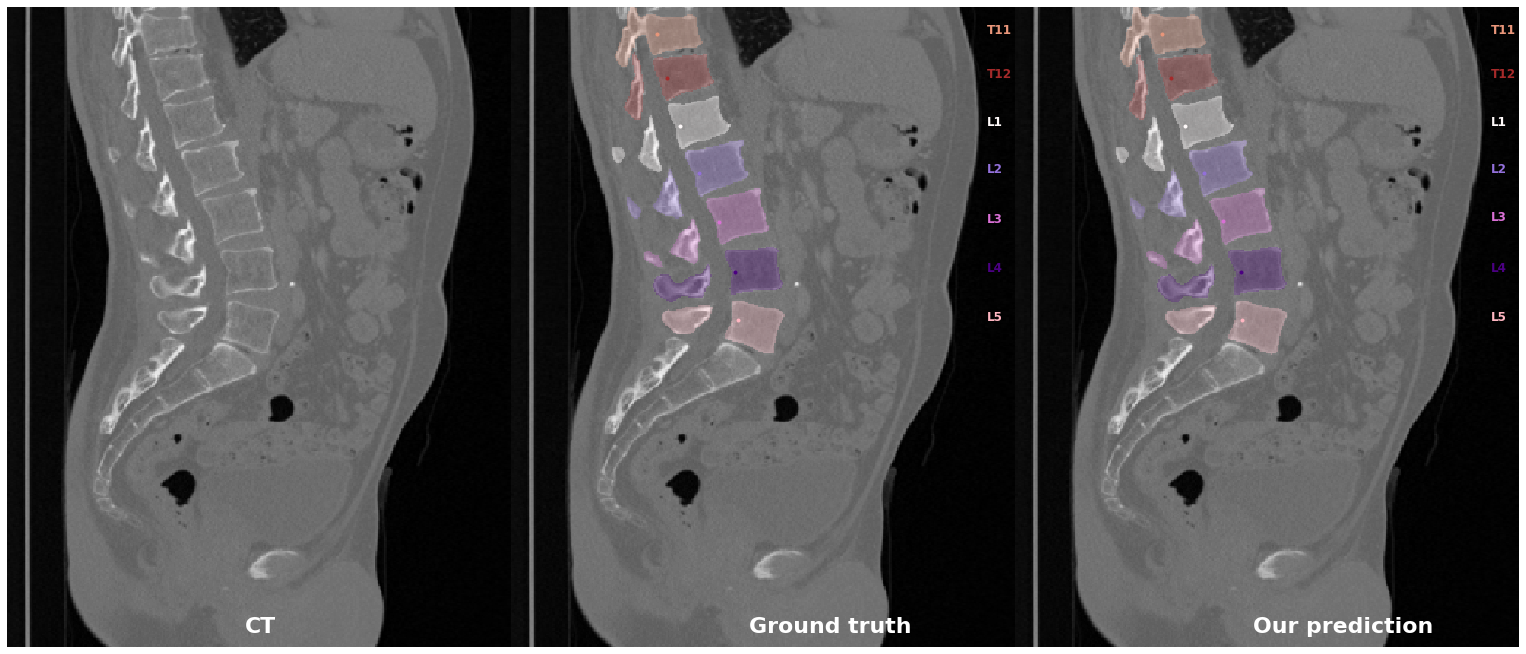

In [3]:
from colormap import *
import numpy as np 
from utils import read_annotations_from_json_file, read_isotropic_pir_img_from_nifti_file


img = read_isotropic_pir_img_from_nifti_file(scan_file)

gt_mask = read_isotropic_pir_img_from_nifti_file(gt_seg_file)
gt_anno = read_annotations_from_json_file(gt_ctd_file)

gt_labels, gt_locations = gt_anno['labels'], gt_anno['locations']

pred_mask = read_isotropic_pir_img_from_nifti_file(pred_seg_file)
pred_anno = read_annotations_from_json_file(pred_ctd_file)

pred_labels, pred_locations = pred_anno['labels'], pred_anno['locations']

sag_img = img[:,:,img.shape[-1]//2]
sag_img = np.rot90(sag_img, 1, (1, 0))

sag_gt_msk = gt_mask[:,:,gt_mask.shape[-1]//2]
sag_gt_msk = np.rot90(sag_gt_msk, 1, (1, 0))
sag_gt_msk[sag_gt_msk==0] = np.nan 

sag_pred_msk = pred_mask[:,:,pred_mask.shape[-1]//2]
sag_pred_msk = np.rot90(sag_pred_msk, 1, (1, 0))
sag_pred_msk[sag_pred_msk==0] = np.nan 

h,w = sag_img.shape

import matplotlib.pyplot as plt 
%matplotlib inline
fig = plt.figure(figsize=(sag_img.shape[0]//20, 1*sag_img.shape[1]//20))

ax1 = plt.subplot(131)
ax1.set_axis_off()
ax1.imshow(sag_img, cmap=plt.cm.gray)
ax1.text(w//2-10, h-10, 'CT', fontdict={'color': 'white', 'weight': 'bold', 'size': '22'})

ax2 = plt.subplot(132)
ax2.set_axis_off()
ax2.imshow(sag_img, cmap=plt.cm.gray)
ax2.imshow(sag_gt_msk, cmap=cm_itk, alpha=0.3, vmin=1, vmax=64)
ax2.text(w//2-10, h-10, 'Ground truth', fontdict={'color': 'white', 'weight': 'bold', 'size': '22'})
for loc, label in zip(gt_locations, gt_labels):
    ax2.plot(w-loc[0], loc[1], '.', color=colors_itk[label-1])
    ax2.text(w-20, loc[1], v_dict[label], fontdict={'color': cm_itk(label-1), 'weight': 'bold', 'size': 'large'})

ax3 = plt.subplot(133)
ax3.set_axis_off()
ax3.imshow(sag_img, cmap=plt.cm.gray)
ax3.imshow(sag_pred_msk, cmap=cm_itk, alpha=0.3, vmin=1, vmax=64)
ax3.text(w//2-10, h-10, 'Our prediction', fontdict={'color': 'white', 'weight': 'bold', 'size': '22'})
for loc, label in zip(pred_locations, pred_labels):
    ax3.plot(w-loc[0], loc[1], '.', color=colors_itk[label-1])
    ax3.text(w-20, loc[1], v_dict[label], fontdict={'color': cm_itk(label-1), 'weight': 'bold', 'size': 'large'})

plt.gca().set_axis_off()
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.show()